# ML-3 Classification using Decision Tree

Pada praktik kali ini, kita akan coba mengembangkan model Decision Tree yang dapat memprediski apakah seseorang beresiko menderita diabetes atau tidak.

# Import Library

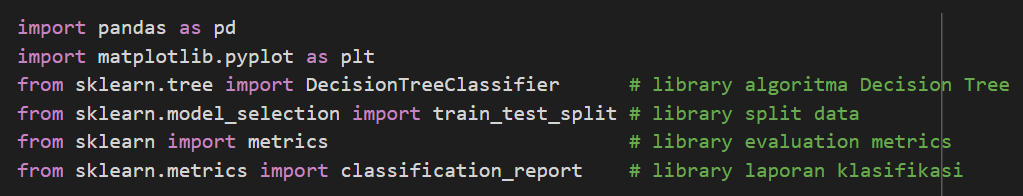

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report



# Load dataset


Download dataset [di sini](https://drive.google.com/file/d/1sWbeSeGnIyfhCiHRq_x1SWe1GnriPcGK/view?usp=sharing)

Setelah dataset berhasil di-download, upload dataset ke Colab supaya bisa digunakan.

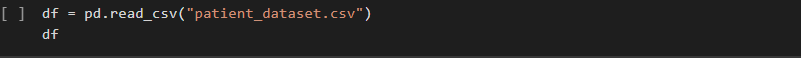

In [ ]:
df = pd.read_csv('patient_dataset.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

Periksa kelengkapan dataset dengan melihat metadatanya menggunakan method `info()`.

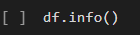

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Terdapat 8 feature:
- Pregnancies
- Glucose
- BooldPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age

dan satu label, yakni Outcome:

- Label 0 = tidak berpotensi menderita diabetes
- Label 1 = berpotensi menderita diabetes

# Data Exploration

**Pisahkan X dan Y dari dataset**

Salah satu kelebihan algoritma Decision Tree adalah kita tidak perlu menormalisasi feature.

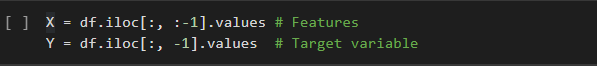

In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

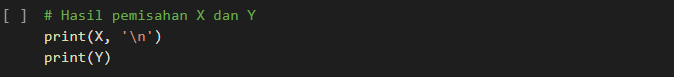

In [ ]:
# Hasil pemisahan X dan Y
print(X, '\n')
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]] 

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1

**Splitting Data**

Split data menjadi:
- training set (X_train, y_train)
- test set (X_test, y_test)

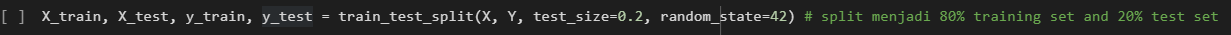

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

---

# Modeling

Algoritma Decision Tree memiliki banyak hyperparameter yang bisa kita setel (tuning hyperparameter). Empat diantaranya adalah:

Hpyerparameter | Keterangan
---|---
criterion | Fungsi untuk mengukur kualitas sebuah split
max_depth | Kedalaman maksimum tree
max_leaf_nodes | Jumlah leaf node maksimum
random_state | Mengontrol ke-random-an algoritma

Hasil tuning hyperparameter yang tepat dapat meningkatkan performa model.

**Note:**

Jika kita tidak tahu secara pasti kegunaan hyperparameter, kita bisa menggunakan setelan default dengan cara mengosongkan hyperparameter.

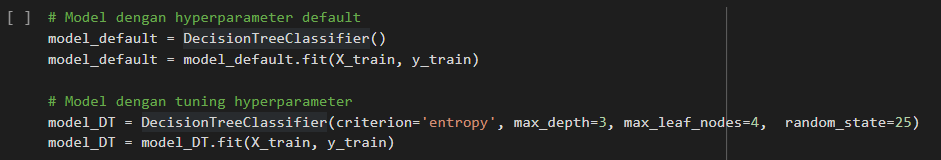

In [ ]:
# Model dengan hyperparameter default
model_default = DecisionTreeClassifier()
model_default = model_default.fit(X_train, y_train)

#Model dengan tuning hyperparameter
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4, random_state=25)
model_DT = model_DT.fit(X_train, y_train)

---

# Evaluation

**Mengevaluasi Performa Model dengan Hyperparameter Default**

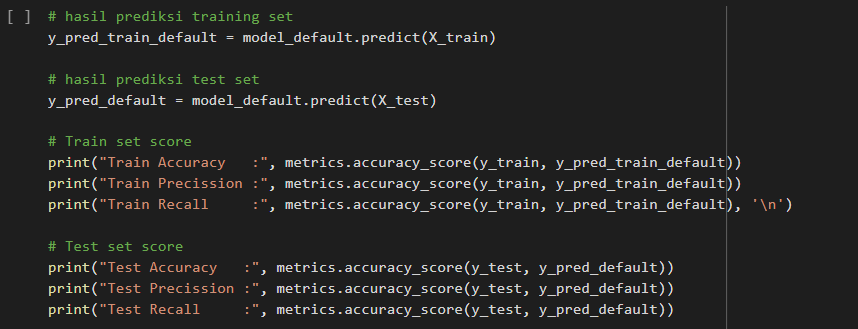

In [ ]:
# Hasil prediksi training set
y_pred_train_deafult = model_default.predict(X_train)

# hasil prediksi test set
y_pred_deafult = model_default.predict(X_test)

#Train set score
print('Train Accuracy :', metrics.accuracy_score(y_train, y_pred_train_deafult))
print('Train Precision :', metrics.precision_score(y_train, y_pred_train_deafult))
print('Train Recall :', metrics.recall_score(y_train, y_pred_train_deafult))

#Test set score
print('Test Accuracy :', metrics.accuracy_score(y_train, y_pred_train_deafult))
print('Test Precision :', metrics.precision_score(y_train, y_pred_train_deafult))
print('Test Recall :', metrics.recall_score(y_train, y_pred_train_deafult))

Train Accuracy : 1.0
Train Precision : 1.0
Train Recall : 1.0
Test Accuracy : 1.0
Test Precision : 1.0
Test Recall : 1.0


**Mengevaluasi Performa Model dengan Tuning Hyperparameter**

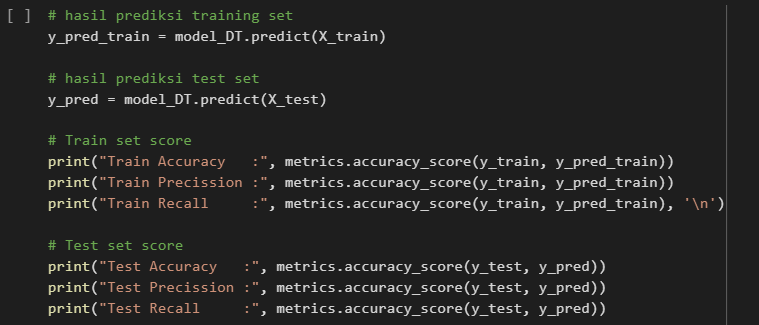

In [ ]:
# Hasil prediksi training set
y_pred_train = model_DT.predict(X_train)

#Hasil prediksi test set
y_pred = model_DT.predict(X_test)

#Train set core
print('Train Accuracy :', metrics.accuracy_score(y_train, y_pred_train))
print('Train Precission :', metrics.accuracy_score(y_train, y_pred_train))
print('Train Recall :', metrics.accuracy_score(y_train, y_pred_train), '\n')

#Test set core
print('Test Accuracy :', metrics.accuracy_score(y_test, y_pred))
print('Test Precission :', metrics.accuracy_score(y_test, y_pred))
print('Test Recall :', metrics.accuracy_score(y_test, y_pred))

Train Accuracy : 0.7719869706840391
Train Precission : 0.7719869706840391
Train Recall : 0.7719869706840391 

Test Accuracy : 0.7727272727272727
Test Precission : 0.7727272727272727
Test Recall : 0.7727272727272727


Berdasarkan hasil evaluasi performa:

- model dengan hyperparameter default mengalami overfitting
- model dengan tuning hyperparameter sudah **good fit**, meskipun memiliki train set score yang lebih rendah



---

**Generate Classification Report**

Kita juga dapat menampilkan hasil evaluasi model menggunakan `classification report`.

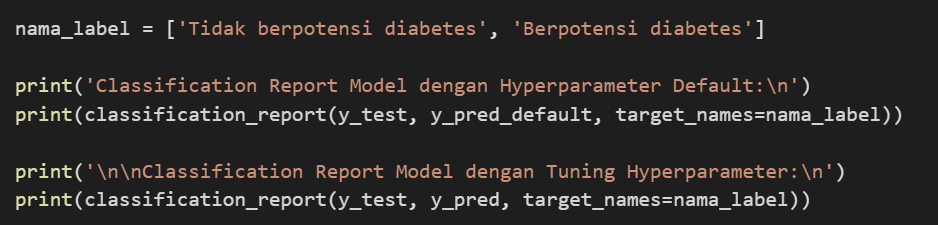

In [ ]:
nama_label = ['Tidak berpotensi diabetes', 'Berpotensi diabetes']

# Before predicting, you need to create and train your model
# Here's an example using a simple decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# Assuming X_train and y_train are your training data
model.fit(X_train, y_train) # Train the model

# Now you can use the trained model to predict
y_pred_default = model.predict(X_test)

print('Classification Report Model dengan Hyperparameter Default:\n')
print(classification_report(y_test, y_pred_default, target_names=nama_label))

print('\n\nClassification Report Model dengan Tuning Hyperparameter:\n')
# Ensure that 'classification_report' is used instead of 'classfication_report'
print(classification_report(y_test, y_pred, target_names=nama_label))

Classification Report Model dengan Hyperparameter Default:

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.84      0.79      0.81        99
      Berpotensi diabetes       0.66      0.73      0.69        55

                 accuracy                           0.77       154
                macro avg       0.75      0.76      0.75       154
             weighted avg       0.77      0.77      0.77       154



Classification Report Model dengan Tuning Hyperparameter:

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.79      0.88      0.83        99
      Berpotensi diabetes       0.73      0.58      0.65        55

                 accuracy                           0.77       154
                macro avg       0.76      0.73      0.74       154
             weighted avg       0.77      0.77      0.77       154



Classification report menampilkan informasi yang lebih detail dan banyak dibanding evaluation metrics.

# Men-Generate Tree

**Tree Model dengan Hyperparameter Default**

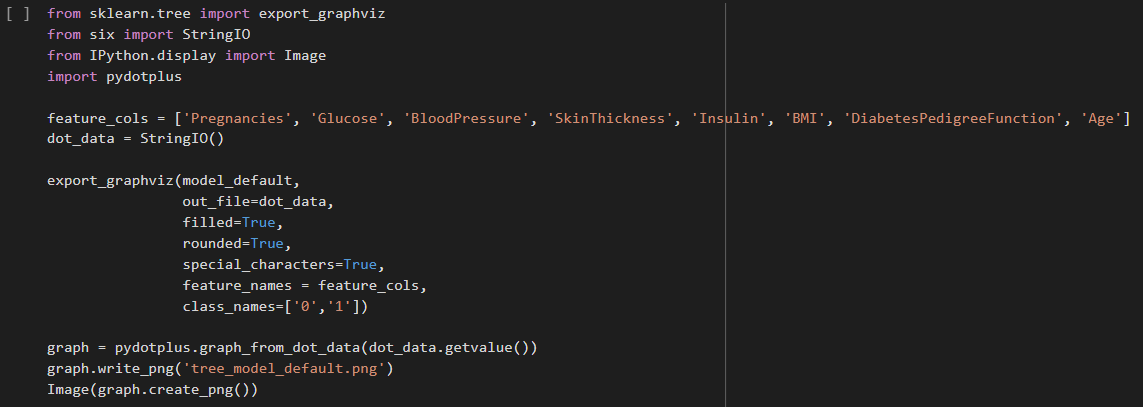

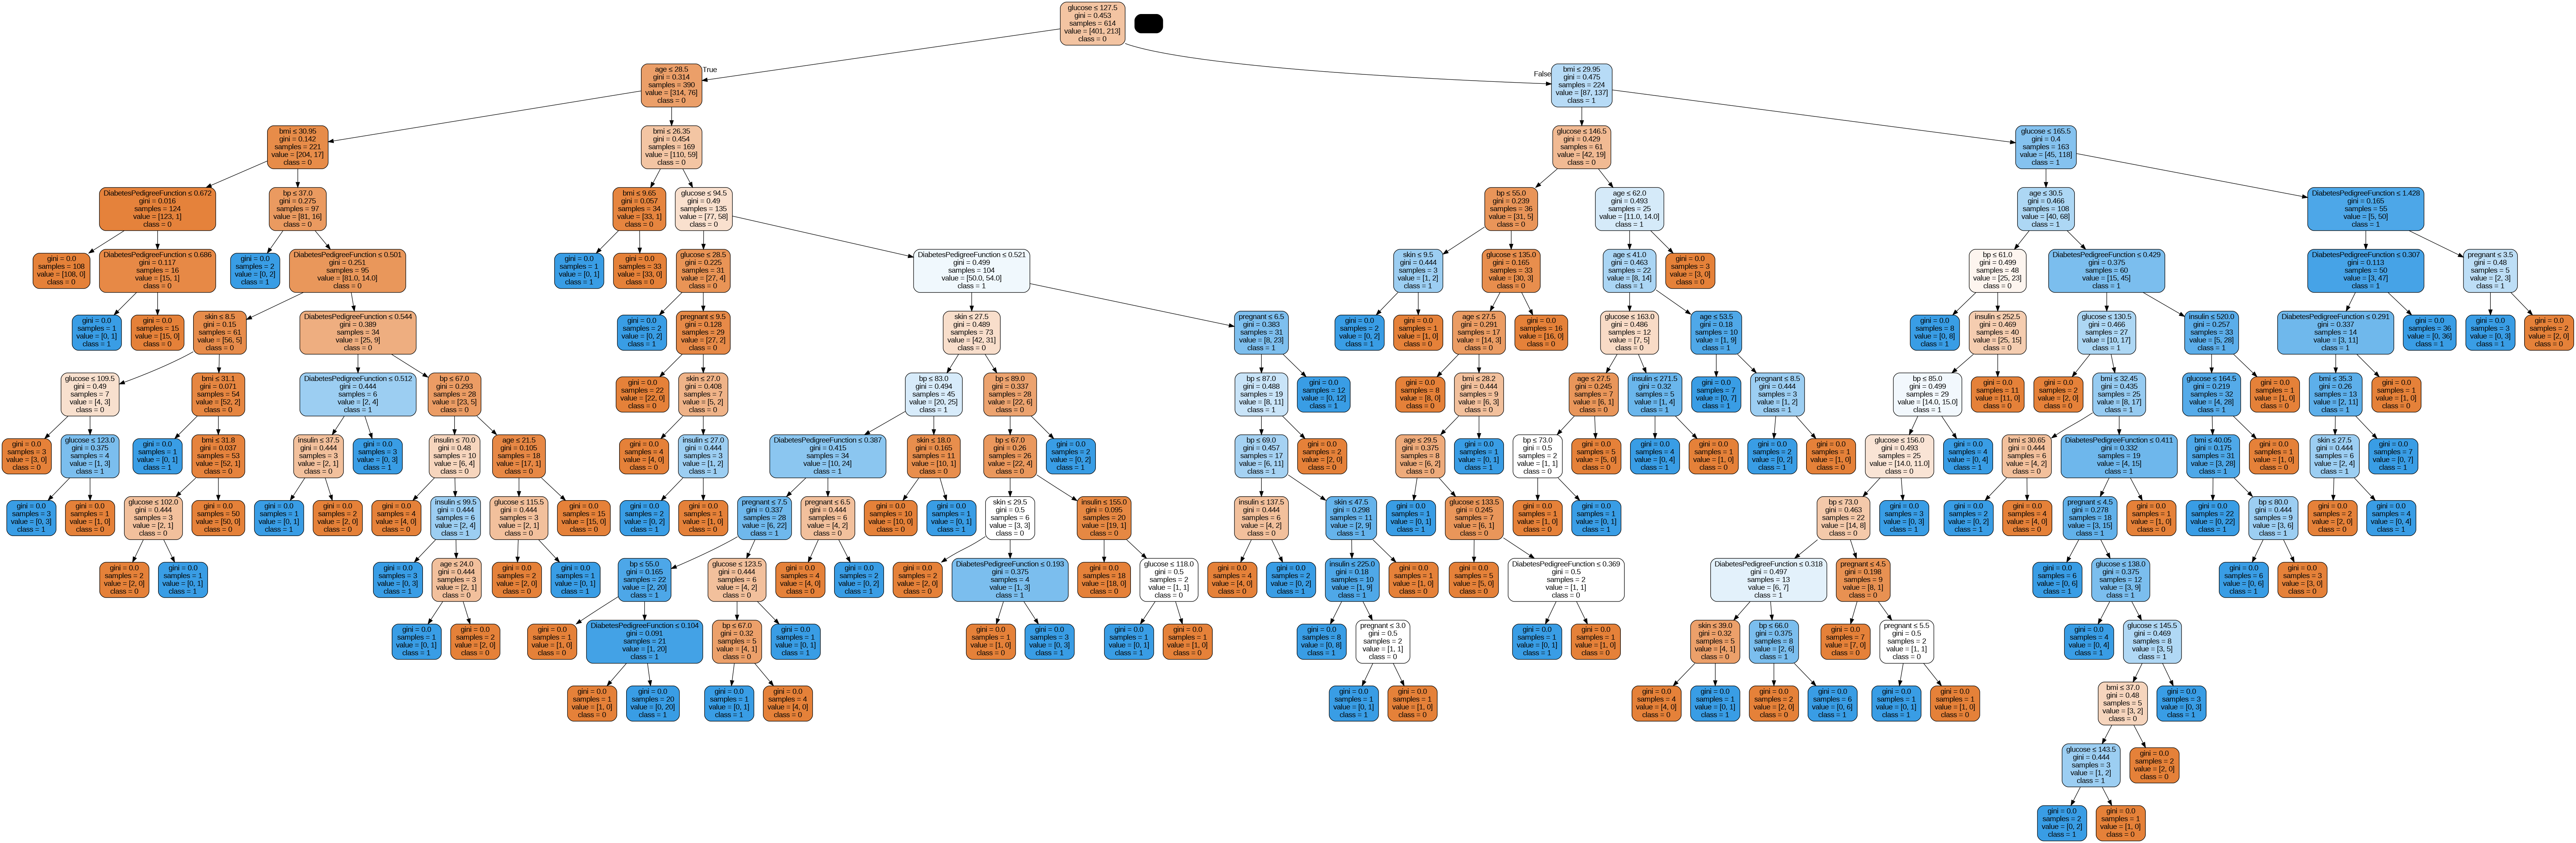

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'DiabetesPedigreeFunction', 'age']
dot_data = StringIO()

export_graphviz(model_default,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_deafult.png')
Image(graph.create_png())

**Tree Model dengan Tuning Hyperparameter**

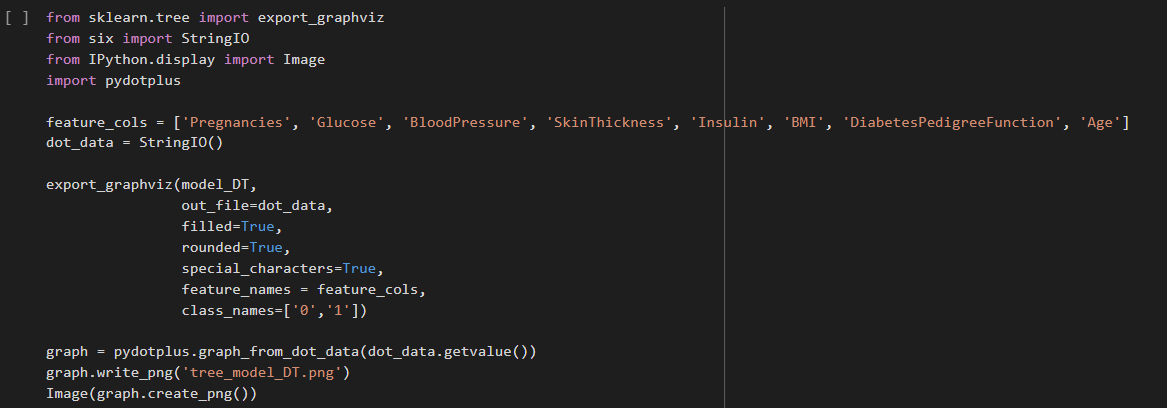

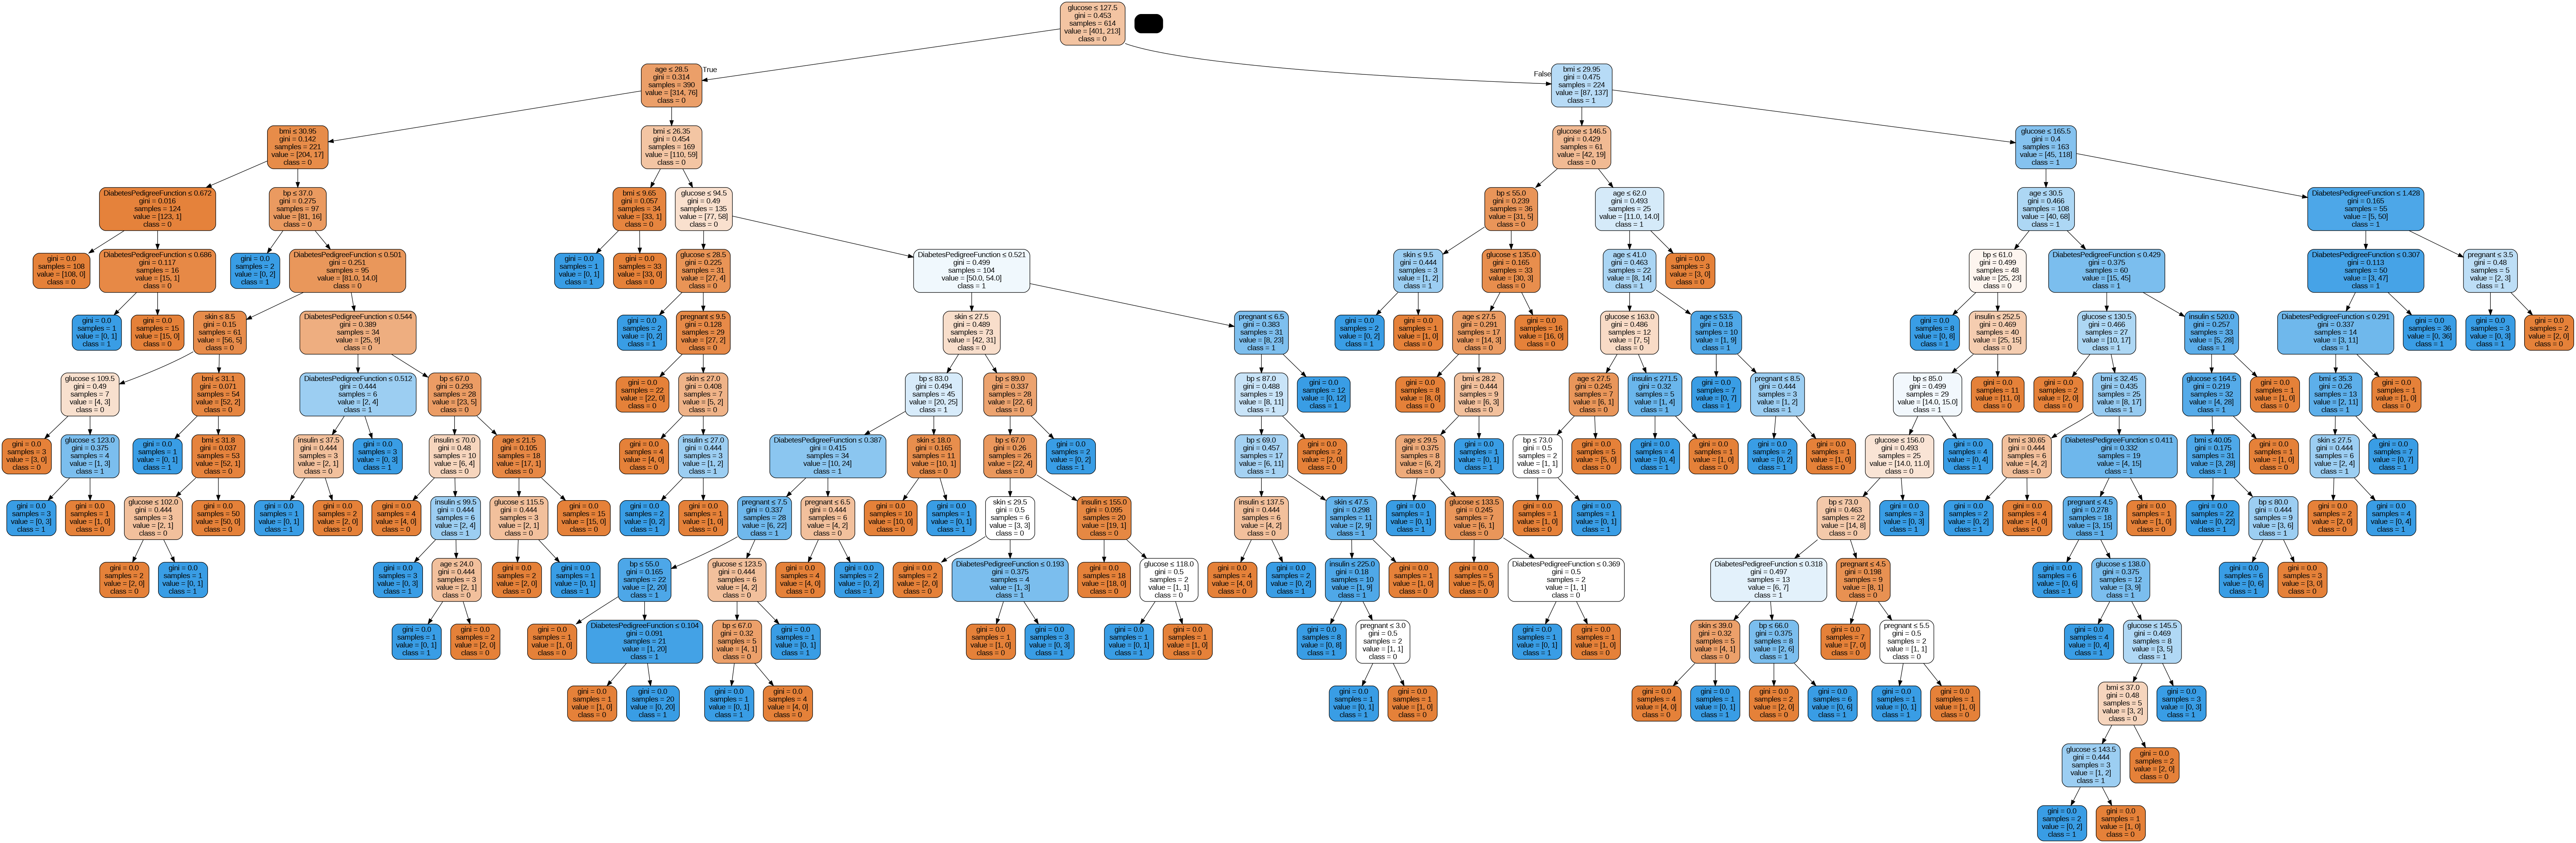

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'DiabetesPedigreeFunction', 'age']
dot_data = StringIO()

export_graphviz(model_default,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_DT.png')
Image(graph.create_png())

Manakah tree yang lebih baik menurut kamu? Kemukakan pendapatmu beserta alasannya!

> **FYI**: Image tree bisa kita download via side menu Colab.

---

**Perhitungan Skor Feature**

Kita juga dapat memeriksa feature apa yang paling penting berdasarkan score feature.

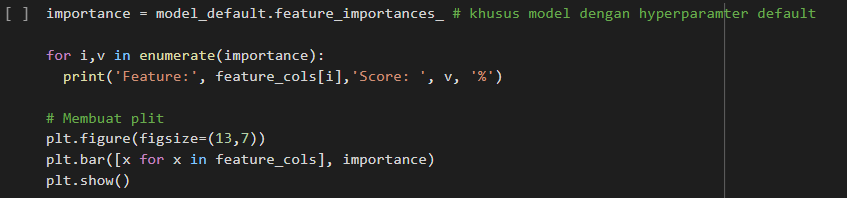

Feature: pregnant Score:  0.05850847077252427 %
Feature: glucose Score:  0.3293570430278914 %
Feature: bp Score:  0.14729630460735846 %
Feature: skin Score:  0.06410457618539807 %
Feature: insulin Score:  0.0641657779061356 %
Feature: bmi Score:  0.14272931571400818 %
Feature: DiabetesPedigreeFunction Score:  0.09289051609924825 %
Feature: age Score:  0.10094799568743577 %


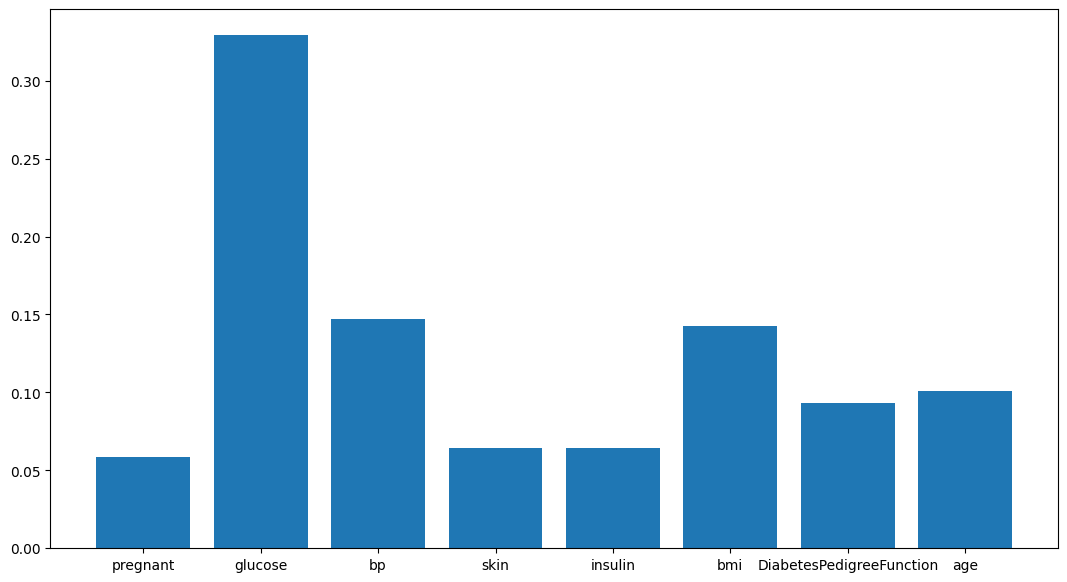

In [ ]:
importance = model_default.feature_importances_

for i,v in enumerate(importance):
  print('Feature:', feature_cols[i], 'Score: ', v, '%')

#membuat plit
plt.figure(figsize=(13,7))
plt.bar([x for x in feature_cols], importance)
plt.show()



---



# Kesimpulan

Decision Tree adalah salah satu algoritma Supervised Learning yang memungkinkan kita membentuk sebuah tree dari dataset.

Tree ini kemudian bisa kita gunakan untuk memprediksi data baru.

Setelan hyperparameter yang tepat dapat meningkatkan perfomarma model.



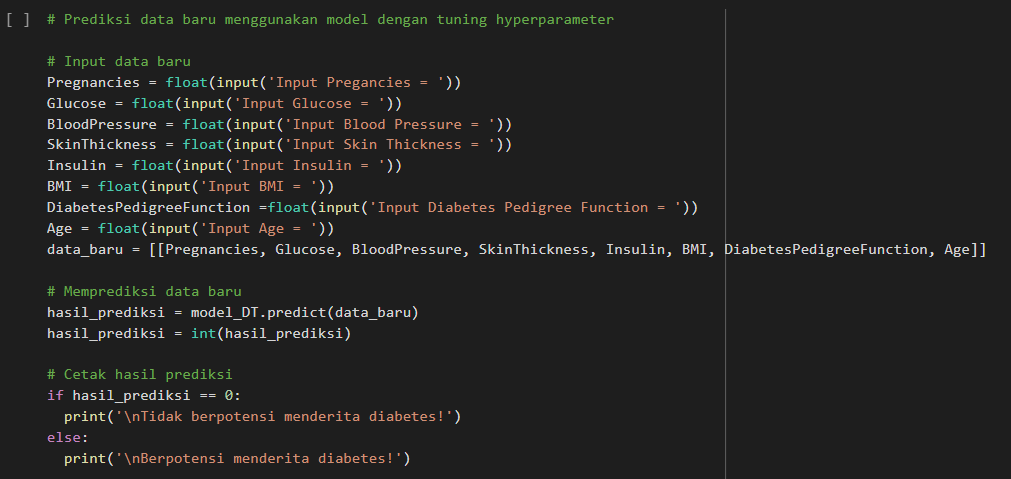

In [ ]:
# prediksi data baru menggunakan model dengan tuning hyperparameter

#input data baru
Pregnancies = float(input('Input Pregnancies = '))
Glucose = float(input('Input Glucose = '))
BloodPressure = float(input('Input BloodPressure = '))
SkinThickness = float(input('Input SkinThickness = '))
Insulin = float(input('Input Insulin = '))
BMI = float(input('Input BMI = '))
DiabetesPedigreeFunction = float(input('Input DiabetesPedigreeFunction = '))
Age = float(input('Input Age = '))
data_baru = [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]

#Memprediksi data baru
hasil_prediksi = model_DT.predict(data_baru)
Hasil_Prediksi = int(hasil_prediksi)

#Cetak hasil print
if hasil_prediksi == 0:
  print('\n Tidak berpotensi terkena diabetes!')
else:
  print('\Berpotensi terkena diabetes')

Input Pregnancies = 20
Input Glucose = 30
Input BloodPressure = 110
Input SkinThickness = 30
Input Insulin = 50
Input BMI = 55
Input DiabetesPedigreeFunction = 40
Input Age = 30

 Tidak berpotensi terkena diabetes!


<ipython-input-32-48155f93a565>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Hasil_Prediksi = int(hasil_prediksi)


# Exercise (Latihan)

Lakukan pemodelan ulang menggunakan dataset yang sama!
1. Gunakan algoritma Decision Tree
2. Pilih 4 dari 8 feature yang tersedia
3. Lakukan tuning hyperparameter hingga mendapat model dengan performa terbaik
4. Generate tree model
5. Buat kesimpulan dari activity yang sudah dilakukan

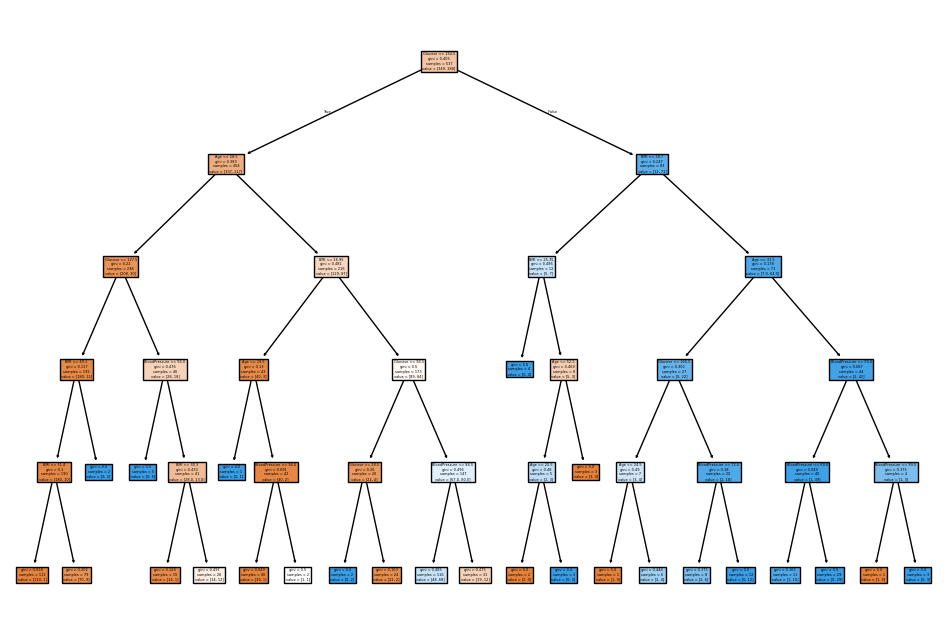

Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.7056277056277056
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.68      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('patient_dataset.csv')

# Pilih fitur dan target
X = data[['Glucose', 'BMI', 'Age', 'BloodPressure']]
y = data['Outcome']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree dan hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5], 'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_

# Generate Decision Tree plot
plt.figure(figsize=(12,8))
plot_tree(best_model, feature_names=['Glucose', 'BMI', 'Age', 'BloodPressure'], filled=True)
plt.show()

# Evaluasi model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Params:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Decision Tree yang dihasilkan dengan fitur dan hyperparameter yang tepat memberikan hasil yang baik dalam memprediksi diabetes. Pemodelan ini tidak hanya akurat tetapi juga mudah untuk diinterpretasikan, yang menjadikannya alat yang kuat untuk diagnosis berbasis data di bidang kesehatan.